# Методы борьбы с переобучением

Для тестирования методов для борьбы с переобучением воспользуемся датасетом Reuters.
Не будем изобретать велосипед, для этого воспользуемся уже [готовым ноутбуком](./%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F%20%D0%BD%D0%BE%D0%B2%D0%BE%D1%81%D1%82%D0%BD%D1%8B%D1%85%20%D0%BB%D0%B5%D0%BD%D1%82.ipynb).

## Используемые библиотеки

In [123]:
import keras
import numpy as np
from keras import layers
from keras import regularizers
import matplotlib.pyplot as plt
from keras import Sequential
from keras.datasets import reuters

## Утилиты

In [58]:
def vectorization(array: np.array, dimension: int = 10_000):
    data = np.zeros((len(array), dimension))
    
    for i, sequence in enumerate(array):
        data[i, sequence] = 1
    
    return data

## Загрузка данных

In [59]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10_000)

## Подготовка данных

In [60]:
x_train = vectorization(x_train)
x_test = vectorization(x_test)

In [61]:
y_train = vectorization(y_train, 46)
y_test = vectorization(y_test, 46)

## Тренировочные и валидационные данные

In [62]:
x_data = x_train
y_data = y_train

x_train = x_data[:7_000]
y_train = y_data[:7_000]

x_val = x_data[7_000:]
y_val = y_data[7_000:]

## Конструирование сети

In [149]:
def build_model():
    model = Sequential()

    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10_000,)))
    model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(46, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

## Первичное обучение

In [150]:
model = build_model()
history = model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=20,
    validation_data=(x_val, y_val)
)

Epoch 1/20
14/14 [==============================] - 1s 60ms/step - loss: 2.8124 - accuracy: 0.5383 - val_loss: 1.8939 - val_accuracy: 0.6655
Epoch 2/20
14/14 [==============================] - 1s 46ms/step - loss: 1.6160 - accuracy: 0.6979 - val_loss: 1.4956 - val_accuracy: 0.7064
Epoch 3/20
14/14 [==============================] - 1s 59ms/step - loss: 1.2864 - accuracy: 0.7550 - val_loss: 1.3620 - val_accuracy: 0.7386
Epoch 4/20
14/14 [==============================] - 1s 49ms/step - loss: 1.1004 - accuracy: 0.8037 - val_loss: 1.2891 - val_accuracy: 0.7563
Epoch 5/20
14/14 [==============================] - 1s 49ms/step - loss: 0.9647 - accuracy: 0.8356 - val_loss: 1.2369 - val_accuracy: 0.7704
Epoch 6/20
14/14 [==============================] - 1s 46ms/step - loss: 0.8555 - accuracy: 0.8604 - val_loss: 1.2088 - val_accuracy: 0.7775
Epoch 7/20
14/14 [==============================] - 1s 46ms/step - loss: 0.7806 - accuracy: 0.8817 - val_loss: 1.1808 - val_accuracy: 0.7886
Epoch 8/20
14

### Контроль качества

In [151]:
history_dict = history.history

In [152]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

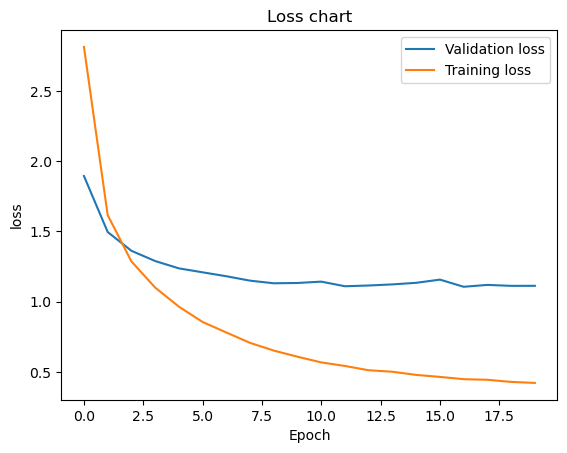

In [153]:
epochs = range(len(history_dict['val_loss']))

fig, ax = plt.subplots()

ax.plot(epochs, history_dict['val_loss'], label='Validation loss')
ax.plot(epochs, history_dict['loss'], label='Training loss')
ax.set(xlabel='Epoch', ylabel='loss', title='Loss chart')

plt.legend()
plt.show()

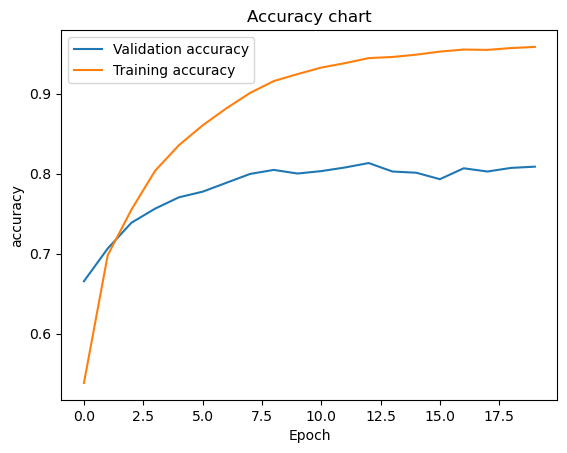

In [154]:
epochs = range(len(history_dict['val_loss']))

fig, ax = plt.subplots()

ax.plot(epochs, history_dict['val_accuracy'], label='Validation accuracy')
ax.plot(epochs, history_dict['accuracy'], label='Training accuracy')
ax.set(xlabel='Epoch', ylabel='accuracy', title='Accuracy chart')

plt.legend()
plt.show()

In [155]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                640064    
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


## Финальное обучение

In [156]:
model = build_model()
model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=10,
    validation_data=(x_val, y_val)
)
result = model.evaluate(x_test, y_test)

Epoch 1/10
14/14 [==============================] - 2s 63ms/step - loss: 2.8332 - accuracy: 0.4826 - val_loss: 1.9642 - val_accuracy: 0.6559
Epoch 2/10
14/14 [==============================] - 1s 65ms/step - loss: 1.6741 - accuracy: 0.6824 - val_loss: 1.5363 - val_accuracy: 0.7190
Epoch 3/10
14/14 [==============================] - 1s 46ms/step - loss: 1.3206 - accuracy: 0.7547 - val_loss: 1.3762 - val_accuracy: 0.7417
Epoch 4/10
14/14 [==============================] - 1s 46ms/step - loss: 1.1223 - accuracy: 0.7970 - val_loss: 1.2998 - val_accuracy: 0.7492
Epoch 5/10
14/14 [==============================] - 1s 46ms/step - loss: 0.9883 - accuracy: 0.8299 - val_loss: 1.2452 - val_accuracy: 0.7684
Epoch 6/10
14/14 [==============================] - 1s 48ms/step - loss: 0.8832 - accuracy: 0.8514 - val_loss: 1.2165 - val_accuracy: 0.7760
Epoch 7/10
14/14 [==============================] - 1s 60ms/step - loss: 0.8022 - accuracy: 0.8733 - val_loss: 1.1736 - val_accuracy: 0.7891
Epoch 8/10
14

In [157]:
result

[1.1821422576904297, 0.7845057845115662]

## Вывод
### Первичная модель
```py
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_9 (Dense)             (None, 64)                640064    
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 46)                2990      
                                                                 
=================================================================
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________
```

1. Переобучение - > 5
2. Потери - 1
3. Точность - 0.8

### Вторая модель
```py
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_28 (Dense)            (None, 64)                640064    
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_30 (Dense)            (None, 46)                2990      
                                                                 
=================================================================
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________
```

1. Переобучение - > 10
2. Потери - 1
3. Точность - 0.7 - 0.8

### Третья модель
```py
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 dense_45 (Dense)            (None, 64)                640064    
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 46)                2990      
                                                                 
=================================================================
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________
```
+
`kernel_regularizer=regularizers.l2(0.001)`

1. Переобучение - > 10
2. Потери - 1
3. Точность - 0.7 - 0.8

Регуляризация модели, как и прореживание(Dropout) позволяет уменьшить эффект переобучение. Но при этом как и повышение нейронов в каждом слое, так и количество слоев не ведет к увелечению качества самой модели. По крайней мере для данной природы данных